In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [101]:
import re
import pandas as pd

# Define the pattern to extract information from each line
pattern = re.compile(r"epoch: (\d+), lr_adam: ([\d.e-]+), lr_wav2vec: ([\d.e-]+) - train loss: ([\d.e-]+) - valid loss: ([\d.e-]+), valid ctc_loss: ([\d.e-]+), valid PER: ([\d.e-]+), valid mpd_f1: ([\d.e-]+)")

# List to store extracted data
data = []

# Path to your text file
file_path = './train_log.txt'

# Read and process each line in the file
with open(file_path, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            epoch, lr_adam, lr_wav2vec, train_loss, valid_loss, ctc_loss, per, mpd_f1 = match.groups()
            data.append({
                'epoch': int(epoch),
                'lr_adam': float(lr_adam),
                'lr_wav2vec': float(lr_wav2vec),
                'train_loss': float(train_loss),
                'valid_loss': float(valid_loss),
                'ctc_loss_valid': float(ctc_loss),
                'per_valid': float(per),
                'mpd_f1_valid': float(mpd_f1)
            })

# Create a DataFrame from the extracted data
df = pd.DataFrame(data)


In [102]:
df

,epoch,lr_adam,lr_wav2vec,train_loss,valid_loss,ctc_loss_valid,per_valid,mpd_f1_valid
0,3,0.0003,0.00001,3.420,3.56,3.56,99.30,0.200
1,4,0.0003,0.00001,3.370,3.40,3.40,95.49,0.200
2,5,0.0003,0.00001,3.230,3.07,3.07,94.45,0.200
3,6,0.0003,0.00001,2.750,2.29,2.29,84.89,0.211
4,7,0.0003,0.00001,1.980,1.43,1.43,49.17,0.300
...,...,...,...,...,...,...,...,...
93,96,0.0003,0.00001,0.157,1.04,1.04,15.90,0.456
94,97,0.0003,0.00001,0.140,1.02,1.01,15.93,0.451
95,98,0.0003,0.00001,0.137,1.04,1.04,16.16,0.442
96,99,0.0003,0.00001,0.138,1.05,1.05,15.92,0.453


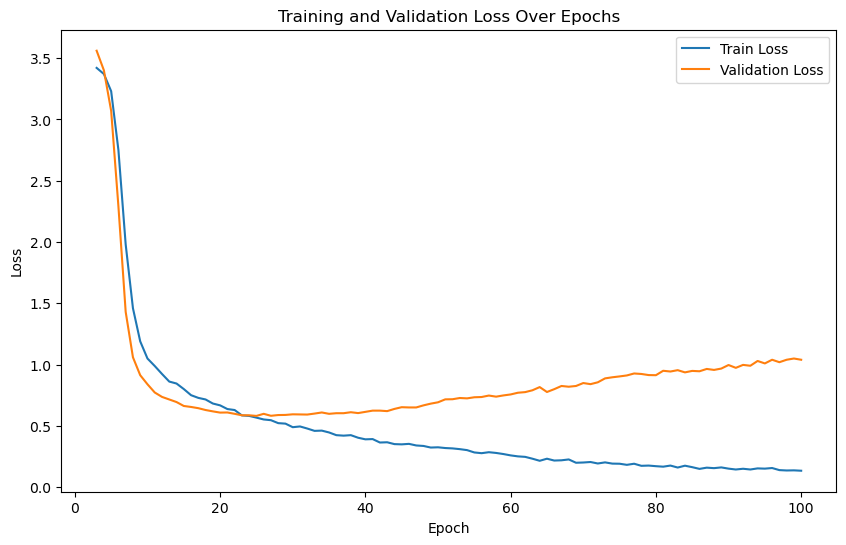

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
plt.plot(df['epoch'], df['valid_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


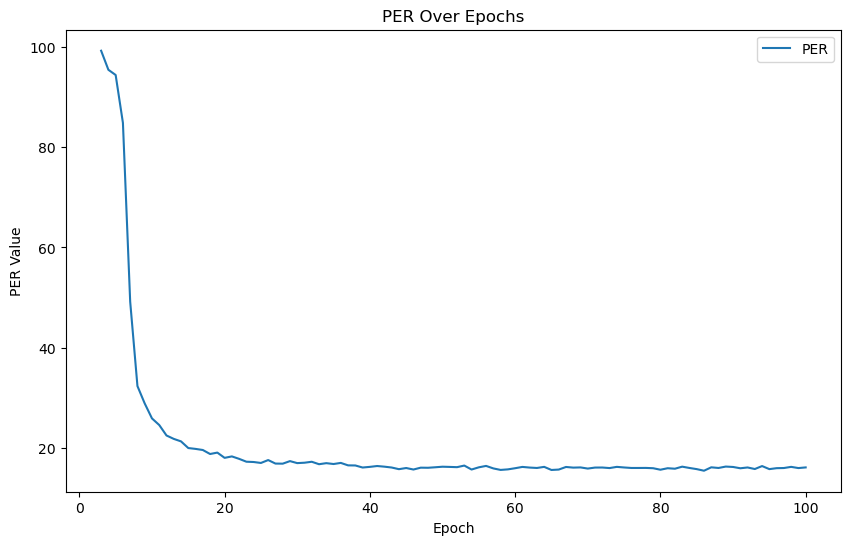

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['per_valid'], label='PER')
plt.title('PER Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('PER Value')
plt.legend()
plt.show()


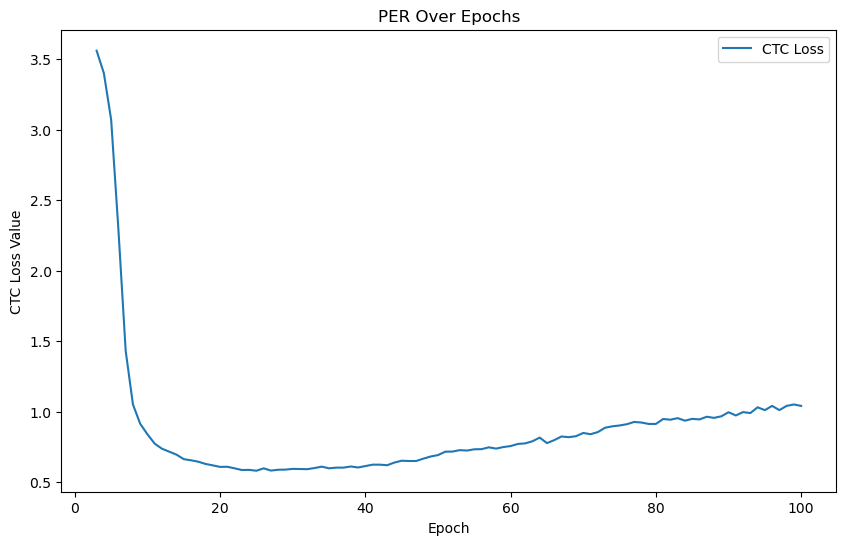

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['ctc_loss_valid'], label='CTC Loss')
plt.title('PER Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('CTC Loss Value')
plt.legend()
plt.show()

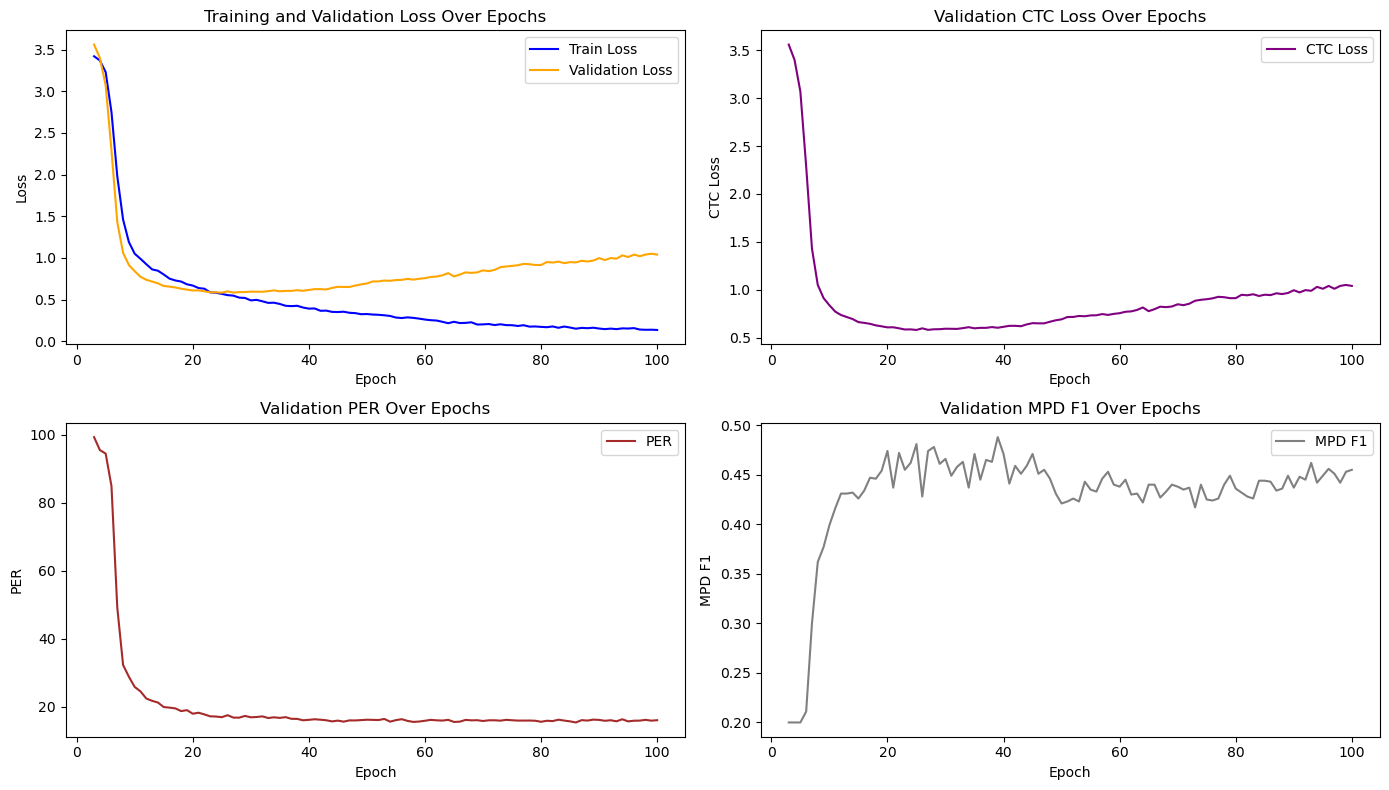

In [20]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss Over Epochs
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', color='blue')
plt.plot(df['epoch'], df['valid_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Validation Metrics Over Epochs
plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['ctc_loss_valid'], label='CTC Loss', color='purple')
plt.title('Validation CTC Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('CTC Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['per_valid'], label='PER', color='brown')
plt.title('Validation PER Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('PER')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['epoch'], df['mpd_f1_valid'], label='MPD F1', color='gray')
plt.title('Validation MPD F1 Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MPD F1')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
best_epoch_per = df[df['per_valid'] == df['per_valid'].min()]['epoch'].values[0]
print(f'Best Epoch based on PER: {best_epoch_per}')

Best Epoch based on PER: 86


In [84]:
import pandas as pd
import re

# Read the file
with open('./wer_copy.txt', 'r') as file:
    data = file.read()

# Define regular expression patterns
alignment_pattern = re.compile(r'={2,}\n([^,]+), %WER (\d+\.\d+) \[ (\d+) / (\d+), (\d+) ins, (\d+) del, (\d+) sub \]\n(.*?)\n={2,}', re.DOTALL)

# Extract alignment details
matches = alignment_pattern.findall(data)

# Initialize lists to store data
file_ids,  wer_values, phoneme_error_count, total_phoneme_count, ins_values, del_values, sub_values, reference_phonemes, ins_sub_del_phonemes, hypothesis_phonemes =[], [], [], [], [], [], [], [], [], []

# Process data
for match in matches:
    file_ids.append(match[0].strip())
    wer_values.append(float(match[1]))
    phoneme_error_count.append(int(match[2]))
    total_phoneme_count.append(int(match[3]))
    ins_values.append(int(match[4]))
    del_values.append(int(match[5]))
    sub_values.append(int(match[6]))

    # Extract reference and hypothesis phonemes if available
    ref_hyp_lines = match[7].strip().split('\n')
    
    ref_line = [phoneme.strip() for phoneme in ref_hyp_lines[0].split(';')[1:]] if len(ref_hyp_lines) > 1 else []
    ins_sub_del_line = [phoneme.strip() for phoneme in ref_hyp_lines[1].split(';')[1:]] if len(ref_hyp_lines) > 1 else []
    hyp_line = [phoneme.strip() for phoneme in ref_hyp_lines[2].split(';')[1:]] if len(ref_hyp_lines) > 1 else []

    reference_phonemes.append(ref_line)
    hypothesis_phonemes.append(hyp_line)
    ins_sub_del_phonemes.append(ins_sub_del_line)

# Create DataFrame
df = pd.DataFrame({
    'File_ID': file_ids,
    'WER': wer_values,
    'Phoneme_Error_Count': phoneme_error_count,
    'Total_Phoneme_Count': total_phoneme_count,
    'INS': ins_values,
    'DEL': del_values,
    'SUB': sub_values,
    'Reference_Phonemes': reference_phonemes,
    'Ins_Del_Sub_Phonemes': ins_sub_del_phonemes,
    'Hypothesis_Phonemes': hypothesis_phonemes
})




In [85]:
df.head()

,File_ID,WER,Phoneme_Error_Count,Total_Phoneme_Count,INS,DEL,SUB,Reference_Phonemes,Ins_Del_Sub_Phonemes,Hypothesis_Phonemes
0,/content/drive/MyDrive/CS5647_Project/dataset/...,18.18,2,11,0,0,2,"[sh, ao, ay, k, eh, r, iy, y, uw, sil]","[=, S, =, =, S, =, =, =, =, =]","[sh, w, ay, k, ae, r, iy, y, uw, sil]"
1,/content/drive/MyDrive/CS5647_Project/dataset/...,26.67,4,15,0,0,4,"[iy, w, ah, l, f, ao, l, ao, ah, s, s, uw, n, ...","[=, =, S, =, =, S, =, S, =, =, =, S, =, =]","[iy, w, ih, l, f, aa, l, ow, ah, s, s, uh, n, ..."
2,/content/drive/MyDrive/CS5647_Project/dataset/...,13.33,2,15,1,0,1,"[ih, l, w, ah, s, ah, l, aa, <eps>, jh, k, ah,...","[=, S, =, =, =, =, =, =, I, =, =, =, =, =, =]","[ih, t, w, ah, s, ah, l, aa, r, jh, k, ah, n, ..."
3,/content/drive/MyDrive/CS5647_Project/dataset/...,6.67,1,15,0,0,1,"[ih, t, w, ah, z, ah, l, aa, jh, k, ah, n, ow,...","[=, =, =, =, =, =, =, =, S, =, =, =, =, =]","[ih, t, w, ah, z, ah, l, aa, ch, k, ah, n, ow,..."
4,/content/drive/MyDrive/CS5647_Project/dataset/...,12.50,2,16,0,0,2,"[hh, iy, v, iy, l, f, aa, l, ow, ah, s, s, uw,...","[=, =, S, S, =, =, =, =, =, =, =, =, =, =, =]","[hh, iy, w, ih, l, f, aa, l, ow, ah, s, s, uw,..."


In [95]:
import re
import pandas as pd

# Read the content of the file
with open('./mpd.txt', 'r') as file:
    data = file.read()

# Define a more permissive pattern for extraction
mpd_stats_pattern = re.compile(r'Total Eq\D*(\d+)\D*Total Sub\D*(\d+)\D*Total Del\D*(\d+)\D*Total Ins\D*(\d+).*?True Accept\D*(\d+)\D*False Rejection\D*(\d+)\D*False Accept\D*(\d+)\D*True Rejection\D*(\d+)\D*Corr Diag\D*(\d+)\D*Err Diag\D*(\d+)', re.DOTALL)

# Find the match
match = mpd_stats_pattern.search(data)

# Check if a match is found
if match:
    # Create lists to store extracted data
    total_eq, total_sub, total_del, total_ins, true_accept, false_rejection, false_accept, true_rejection, corr_diag, err_diag = map(int, match.groups())

    # Create DataFrame
    df = pd.DataFrame({
        'Total_Eq': [total_eq],
        'Total_Sub': [total_sub],
        'Total_Del': [total_del],
        'Total_Ins': [total_ins],
        'True_Accept': [true_accept],
        'False_Rejection': [false_rejection],
        'False_Accept': [false_accept],
        'True_Rejection': [true_rejection],
        'Corr_Diag': [corr_diag],
        'Err_Diag': [err_diag]
    })

else:
    print("No match found.")


In [96]:
df

,Total_Eq,Total_Sub,Total_Del,Total_Ins,True_Accept,False_Rejection,False_Accept,True_Rejection,Corr_Diag,Err_Diag
0,8715,972,196,81,7968,869,762,487,349,138


In [107]:
# Calculate Word Error Rate (WER)
df['WER'] = (df['Total_Sub'] + df['Total_Del'] + df['Total_Ins']) / (df['Total_Eq']) * 100

# Calculate Accuracy
df['Accuracy'] = df['True_Accept'] / (df['True_Accept'] + df['False_Rejection'] + df['False_Accept'] + df['True_Rejection']) * 100

# Calculate Precision
df['Precision'] = df['True_Accept'] / (df['True_Accept'] + df['False_Accept']) * 100

# Calculate Recall (Sensitivity)
df['Recall'] = df['True_Accept'] / (df['True_Accept'] + df['False_Rejection']) * 100

# Calculate Specificity
df['Specificity'] = df['True_Rejection'] / (df['True_Rejection'] + df['False_Accept']) * 100

# Calculate F1 Score
df['F1_Score'] = 2 * (df['Precision'] * df['Recall']) / (df['Precision'] + df['Recall'])

KeyError: 'Total_Sub'

In [105]:
df

,epoch,lr_adam,lr_wav2vec,train_loss,valid_loss,ctc_loss_valid,per_valid,mpd_f1_valid
0,3,0.0003,0.00001,3.420,3.56,3.56,99.30,0.200
1,4,0.0003,0.00001,3.370,3.40,3.40,95.49,0.200
2,5,0.0003,0.00001,3.230,3.07,3.07,94.45,0.200
3,6,0.0003,0.00001,2.750,2.29,2.29,84.89,0.211
4,7,0.0003,0.00001,1.980,1.43,1.43,49.17,0.300
...,...,...,...,...,...,...,...,...
93,96,0.0003,0.00001,0.157,1.04,1.04,15.90,0.456
94,97,0.0003,0.00001,0.140,1.02,1.01,15.93,0.451
95,98,0.0003,0.00001,0.137,1.04,1.04,16.16,0.442
96,99,0.0003,0.00001,0.138,1.05,1.05,15.92,0.453


In [99]:
# Given values
true_accept = 7968
false_rejection = 869
false_accept = 762
true_rejection = 487
corr_diag = 349
err_diag = 138

# Calculating FAR (False Acceptance Rate)
far = false_accept / (false_accept + true_rejection)

# Calculating FRR (False Rejection Rate)
frr = false_rejection / (false_rejection + true_accept)

# Calculating TAR (True Acceptance Rate)
tar = true_accept / (true_accept + false_rejection)

# Calculating TRR (True Rejection Rate)
trr = true_rejection / (true_rejection + false_accept)

# Printing the results
print("FAR:", far)
print("FRR:", frr)
print("TAR:", tar)
print("TRR:", trr)

FAR: 0.610088070456365
FRR: 0.09833653954962092
TAR: 0.901663460450379
TRR: 0.3899119295436349


1. FAR	0.610	This means that there is a 61% chance that the system will incorrectly accept a phoneme.
2. FRR	0.098	This means that there is a 9.8% chance that the system will incorrectly reject a correct phoneme.
3. TAR	0.902	This means that there is a 90.2% chance that the system will correctly accept a phoneme.
4. TRR	0.390	This means that there is a 39% chance that the system will correctly reject a wrongly pronounced phoneme.